In [1]:
using Knet
using VGG
using Images
using TestImages

if Knet.gpu() >= 0
    ATYPE = KnetArray{Float32}
else
    ATYPE = Array{Float32}
end

┌ Info: Recompiling stale cache file /home/davll/.julia/compiled/v1.2/VGG/Tl1Pn.ji for VGG [2e1e6a21-ea4d-4bc4-a426-5f6a3782a4c2]
└ @ Base loading.jl:1240


Array{Float32,N} where N

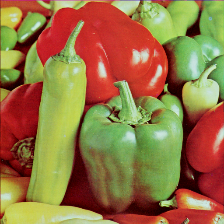

size(img) = (224, 224)
typeof(img) = Array{RGB{Normed{UInt8,8}},2}


In [2]:
img = testimage("pepper");
#img = testimage("toucan");
#img = load("elephant.jpg");
img = imresize(img, 224,224);
@show size(img)
@show typeof(img)
img |> display

In [3]:
model = load_model(VGG16);

In [4]:
x = cat(
    (img .|> red .|> reinterpret .|> Float32),
    (img .|> green .|> reinterpret .|> Float32),
    (img .|> blue .|> reinterpret .|> Float32),
    dims=3
);
x = reshape(x,size(x)...,1) .- model.mean_color;
x = convert(ATYPE, x);

In [5]:
o = model(x)

1000×1 Array{Float32,2}:
 2.0699057e-8 
 3.3912505e-7 
 1.4484756e-9 
 6.324615e-10 
 7.2416834e-10
 1.7517766e-9 
 9.1405455e-10
 2.0400662e-8 
 3.5406775e-9 
 1.9755489e-10
 5.237413e-10 
 1.0794467e-8 
 8.8641245e-9 
 ⋮            
 3.2432482e-7 
 2.3399507e-5 
 3.4636653e-7 
 1.3603238e-7 
 2.8016626e-7 
 7.602947e-8  
 1.7849182e-8 
 1.8832701e-7 
 4.491107e-6  
 5.6636257e-8 
 6.0958395e-5 
 4.9698038e-8 

In [6]:
model.class_descs[argmax(o)[1]]

"bell pepper"